Housing market
==============

Zillow is a website providing information about houses for sale. It also collects a lot of data on the real estate market. These data are available here <http://www.zillow.com/research/data/>. 

Our goal is to investigate at the zipcode level the difference between the median listed price (price that people ask for their house) and the median sale price (price for which the house ends up being sold) from Jan 2010 to May 2016. 

We would like to:
- Investigate the data and come up with a strategy on how to clean the messy csv. Inspire yourself from the tidyr script we just looked at. 
- Create the pseudocode of the steps you need to do to be able to compute the difference listed price - sale price
- Implement your strategy on both csv. Might be slightly different steps.
- join and compute the difference listed price - sale price
- plot the time-series for the average median listed price for the county of Santa Barbara
- how does it compare to the national average?
- add the time-series for the average sale price for the county of Santa Barbara 

In [9]:
import pandas as pd
import os

In [10]:
# CONSTANTS
## INPUTS
my_path = "/home/shares/jupyterhub/data/zillow/zip"
price_listing_file = "Zip_MedianListingPrice_AllHomes.csv"
price_sold_file = "Zip_MedianSoldPrice_AllHomes.csv"

## Listing Data

In [18]:
# Read input files
listing_data = pd.read_csv(os.path.join(my_path,"Zip_MedianListingPrice_AllHomes.csv"))
listing_data.head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05
0,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,...,1197444.0,1200000.0,1200000.0,1237000.0,1285500.0,1335000.0,1390000.0,1340000.0,1387500.0,1297000.0
1,60657,Chicago,IL,Chicago,Cook,2,349000.0,349000.0,339000.0,340000.0,...,374900.0,379450.0,381250.0,384400.0,380700.0,384950.0,439950.0,439500.0,425000.0,425000.0
2,60614,Chicago,IL,Chicago,Cook,3,NaN,NaN,NaN,NaN,...,529000.0,575000.0,567000.0,579000.0,579000.0,587000.0,599900.0,559900.0,559000.0,569900.0
3,79936,El Paso,TX,El Paso,El Paso,4,132000.0,129900.0,129900.0,129900.0,...,130500.0,131000.0,129900.0,129900.0,129000.0,129500.0,132010.0,129900.0,128750.0,133500.0
4,77084,Houston,TX,Houston,Harris,5,117500.0,117900.0,119900.0,120000.0,...,168500.0,170000.0,175000.0,175000.0,179975.0,175000.0,178000.0,179995.0,186090.0,189000.0


In [12]:
# subset Santa Barbara
listing_sb = listing_data[listing_data['City']=='Santa Barbara']
listing_sb.head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05
3700,93105,Santa Barbara,CA,"Santa Maria-Santa Barbara, CA",Santa Barbara,3700,NaN,NaN,NaN,NaN,...,1099000.0,1099000.0,1100000.0,1150000.0,1150000.0,1095000.0,1132500.0,1125000.0,1159000.0,1195000.0
5795,93103,Santa Barbara,CA,"Santa Maria-Santa Barbara, CA",Santa Barbara,5795,NaN,NaN,NaN,NaN,...,1445000.0,1450000.0,1450000.0,1362000.0,1440000.0,1585000.0,1395000.0,1592000.0,1539000.0,1749000.0
7514,93109,Santa Barbara,CA,"Santa Maria-Santa Barbara, CA",Santa Barbara,7514,NaN,NaN,NaN,NaN,...,1325000.0,1360000.0,1345000.0,1395000.0,1445000.0,1517500.0,1449000.0,1424000.0,1382000.0,1350000.0


In [50]:
# Convert to wide format
listing_sb_zip = pd.melt(listing_sb,id_vars=['RegionName','City','State', 'Metro','CountyName','SizeRank'], var_name="date", value_name="listing_price")
listing_sb_zip.head()

,RegionName,City,State,Metro,CountyName,SizeRank,date,listing_price
0,93105,Santa Barbara,CA,"Santa Maria-Santa Barbara, CA",Santa Barbara,3700,2010-01,NaN
1,93103,Santa Barbara,CA,"Santa Maria-Santa Barbara, CA",Santa Barbara,5795,2010-01,NaN
2,93109,Santa Barbara,CA,"Santa Maria-Santa Barbara, CA",Santa Barbara,7514,2010-01,NaN
3,93105,Santa Barbara,CA,"Santa Maria-Santa Barbara, CA",Santa Barbara,3700,2010-02,NaN
4,93103,Santa Barbara,CA,"Santa Maria-Santa Barbara, CA",Santa Barbara,5795,2010-02,NaN


In [51]:
# Set the date as index
listing_sb_zip.index = pd.to_datetime(listing_sb_zip.pop('date'))
listing_sb_zip.head()

,RegionName,City,State,Metro,CountyName,SizeRank,listing_price
date,,,,,,,
2010-01-01,93105,Santa Barbara,CA,"Santa Maria-Santa Barbara, CA",Santa Barbara,3700,NaN
2010-01-01,93103,Santa Barbara,CA,"Santa Maria-Santa Barbara, CA",Santa Barbara,5795,NaN
2010-01-01,93109,Santa Barbara,CA,"Santa Maria-Santa Barbara, CA",Santa Barbara,7514,NaN
2010-02-01,93105,Santa Barbara,CA,"Santa Maria-Santa Barbara, CA",Santa Barbara,3700,NaN
2010-02-01,93103,Santa Barbara,CA,"Santa Maria-Santa Barbara, CA",Santa Barbara,5795,NaN


In [54]:
# Compute the average for the city
listing_sb_ts = listing_sb_zip.groupby(level='date').mean()
listing_sb_ts.head()

,RegionName,SizeRank,listing_price
date,,,
2010-01-01,93105.666667,5669.666667,NaN
2010-02-01,93105.666667,5669.666667,NaN
2010-03-01,93105.666667,5669.666667,NaN
2010-04-01,93105.666667,5669.666667,NaN
2010-05-01,93105.666667,5669.666667,NaN


In [55]:
# some house cleaning
listing_sb_ts.drop(listing_sb_ts.columns[[0, 1]], axis=1, inplace=True)
listing_sb_ts.head()

,listing_price
date,
2010-01-01,NaN
2010-02-01,NaN
2010-03-01,NaN
2010-04-01,NaN
2010-05-01,NaN


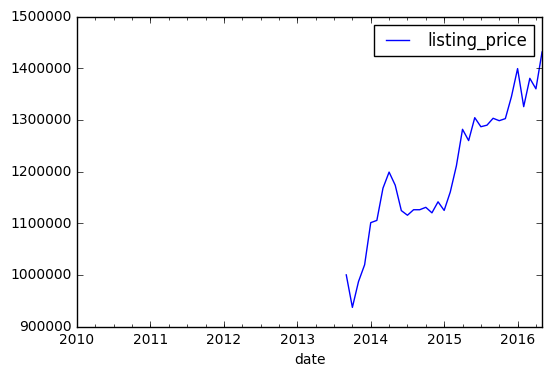

In [56]:
# plot the time-series
listing_sb_ts.plot(kind='line')

## Sale Data

In [74]:
# Load the sale data
sold_data = pd.read_csv(os.path.join(my_path,"Zip_MedianSoldPrice_AllHomes.csv"))
sold_data.head(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05
0,61639,10025,New York,NY,New York,New York,1,175000.0000,NaN,NaN,...,1037000.0,975000.0,1016000.0,962750.0,1010000.0,1079500.0,940500.0,852750.0,824746.5,804172.55
1,84654,60657,Chicago,IL,Chicago,Cook,2,137911.7647,137900.0,133925.0,...,378500.0,381975.0,372325.0,363975.0,374725.0,340150.0,348350.0,395000.0,403600.0,376775.00
2,61637,10023,New York,NY,New York,New York,3,403823.5294,355025.0,NaN,...,925500.0,876750.0,871000.0,865000.0,859000.0,861800.0,850900.0,853700.0,887608.0,901530.60


In [75]:
# subset Santa Barbara
sold_sb = sold_data[sold_data['City']=='Santa Barbara']

In [76]:
# Convert to wide format
sold_sb_zip = pd.melt(sold_sb,id_vars=['RegionID','RegionName','City','State', 'Metro','CountyName','SizeRank'], var_name="date", value_name="listing_price")
# Set the date as index
sold_sb_zip.index = pd.to_datetime(sold_sb_zip.pop('date'))
sold_sb_zip.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,listing_price
date,,,,,,,,
1996-04-01,97124,93101,Santa Barbara,CA,Santa Maria-Santa Barbara,Santa Barbara,2738,NaN
1996-04-01,97127,93105,Santa Barbara,CA,Santa Maria-Santa Barbara,Santa Barbara,3566,276150.0
1996-04-01,97126,93103,Santa Barbara,CA,Santa Maria-Santa Barbara,Santa Barbara,5689,NaN
1996-04-01,97132,93110,Santa Barbara,CA,Santa Maria-Santa Barbara,Santa Barbara,6180,300000.0
1996-04-01,97131,93109,Santa Barbara,CA,Santa Maria-Santa Barbara,Santa Barbara,7577,NaN


In [77]:
# Compute the average for the city
sold_sb_ts = sold_sb_zip.groupby(level='date').mean()

# some house cleaning
sold_sb_ts.drop(sold_sb_ts.columns[[0,1,2]], axis=1, inplace=True)

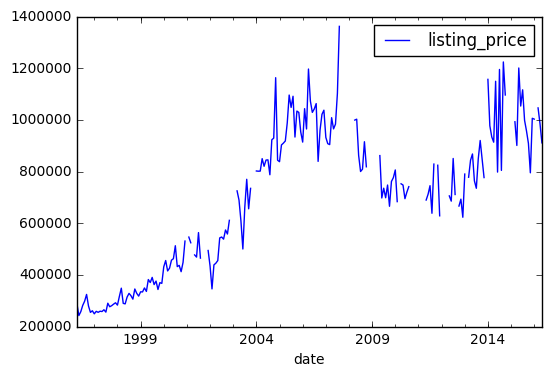

In [78]:
# plot the time-series
sold_sb_ts.plot(kind='line')

In [81]:
# Fill the NAs
sold_sb_filled = sold_sb_ts.fillna(method='ffill')

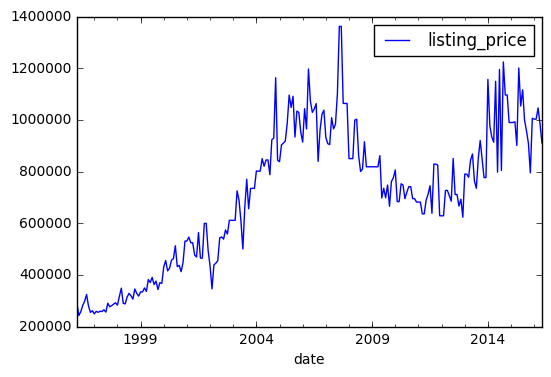

In [82]:
sold_sb_filled.plot(kind='line')

In [86]:
difference = sold_sb_filled - listing_sb_ts

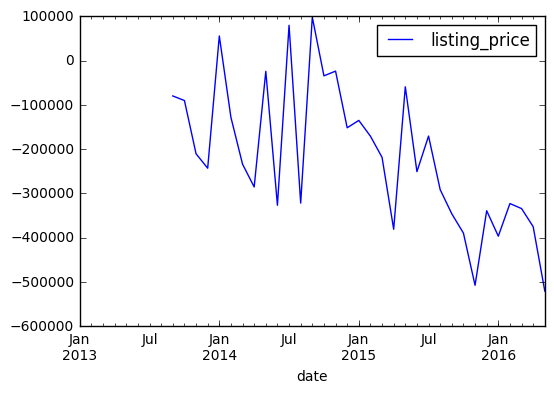

In [87]:
difference['2013':'2016'].plot(kind='line')